## 1. Import Module

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## 2. Load Data

image: pixel(0 ~ 255), label : 0 ~ 9

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 3. Data Exploration

In [8]:
train_x.shape

(60000, 28, 28)

In [9]:
len(train_y)

60000

In [10]:
test_x.shape

(10000, 28, 28)

In [11]:
len(test_y)

10000

## 4. Data Preprocessing

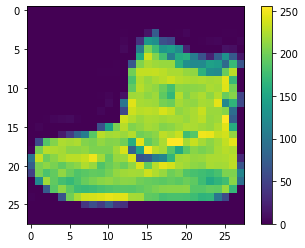

In [15]:
plt.figure()
plt.imshow(train_x[0])
plt.colorbar()
plt.show()

값의 범위를 조정

In [16]:
train_x, test_x = train_x / 255.0, test_x / 255.0

데이터가 잘 구성되었는지 확인

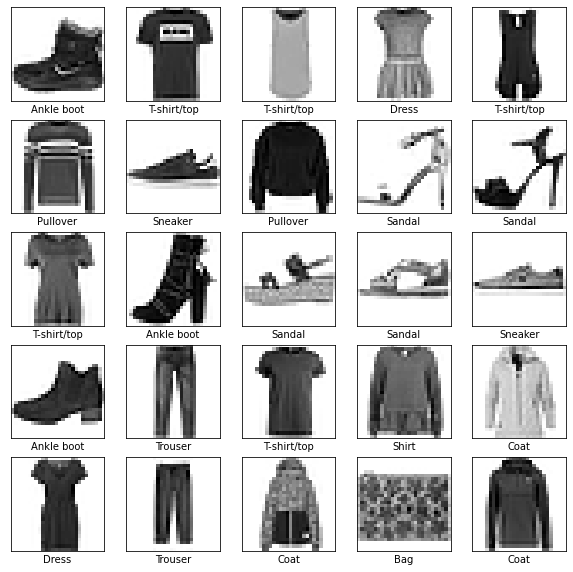

In [18]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i]])
plt.show()

## 5. Network Structure

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 6. Model Training

In [20]:
model.fit(train_x, train_y, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5036 - accuracy: 0.8223
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3736 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3389 - accuracy: 0.8754
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3128 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.8919


## 7. Model Evaluation

In [21]:
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=2)

print("\n테스트 정확도: ", test_acc)

313/313 - 0s - loss: 0.3562 - accuracy: 0.8735

테스트 정확도:  0.8734999895095825


## 8. Prediction

In [22]:
predictions = model.predict(test_x)

In [23]:
predictions[0]

array([6.1908344e-05, 8.4468462e-07, 3.4026382e-06, 5.3415456e-06,
       2.8616057e-06, 1.0653474e-02, 1.7819710e-05, 9.8111682e-02,
       1.9272120e-04, 8.9094990e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_y[0]

9

In [32]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

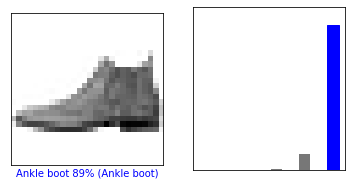

In [33]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_y, test_x)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_y)
plt.show()

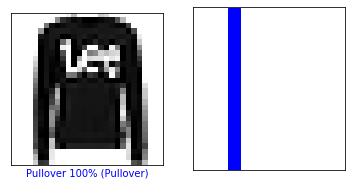

In [34]:
i = 1
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_y, test_x)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_y)
plt.show()

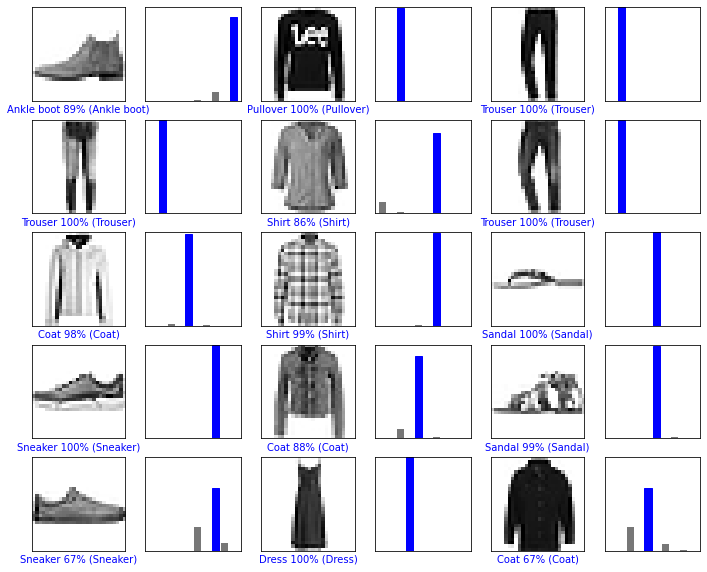

In [37]:
num_rows = 5
num_cols = 3
num_images = 15
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_y, test_x)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_y)
plt.show()

In [55]:
img = test_x[0]
print(img.shape)

(28, 28)


In [56]:
img = (np.expand_dims(img, 0))   # 하나의 값을 예측하는 경우에도 batch, 묶음 형태로 넘겨줘야 함
print(img.shape)

(1, 28, 28)


In [57]:
predictions_single = model.predict(img)
print(predictions_single)

[[6.1908235e-05 8.4468309e-07 3.4026386e-06 5.3415256e-06 2.8616005e-06
  1.0653472e-02 1.7819677e-05 9.8111533e-02 1.9272104e-04 8.9095002e-01]]


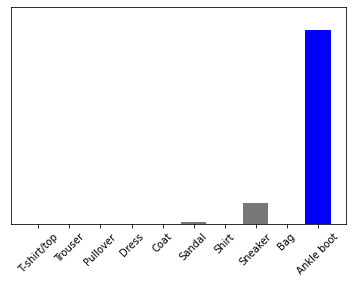

In [62]:
plot_value_array(0, predictions_single, test_y)
_ = plt.xticks(range(10), class_names, rotation=45)